# Linear Regression

**Problem: Housing Price Prediction**

Dataset used: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction?select=Housing.csv

This dataset provides key features for predicting house prices, including area, bedrooms, bathrooms, stories, amenities like air conditioning and parking, and information on furnishing status. It enables analysis and modelling to understand the factors impacting house prices and develop accurate predictions in real estate markets.


## Introduction

**Linear Regression** is one of the most fundamental algorithms in machine learning. It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to observed data.

### Key Concepts:

- **Supervised Learning**: Linear regression is a supervised learning algorithm, meaning we train it on labeled data (input-output pairs)
- **Regression Task**: Unlike classification which predicts discrete categories, regression predicts continuous numerical values
- **Use Cases**: Price prediction, trend analysis, forecasting, and understanding relationships between variables

## Step 1: Import Libraries and Load Data

We'll start by importing the necessary libraries:

- **NumPy**: For numerical operations and array handling
- **Matplotlib**: For data visualization and plotting
- **Pandas**: For data manipulation and analysis

The `describe()` function provides statistical summary of the dataset including count, mean, standard deviation, min, and max values for each numerical column.

In [292]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('datasets/housing-price-prediction.csv')
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [293]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Exploring the Dataset

The `head()` function displays the first 5 rows of the dataset, giving us a quick look at:
- **Features**: area, bedrooms, bathrooms, stories, and various amenities
- **Target**: price (the value we want to predict)

For this tutorial, we'll focus on **univariate linear regression**, using only the house area to predict its price.

## Step 2: Prepare Training Data

In machine learning, we typically use the following notation:

- **$x$**: Input variable (feature) - in our case, the house area in square feet
- **$y$**: Output variable (target) - the house price we want to predict
- **$m$**: Number of training examples
- **$(x^{(i)}, y^{(i)})$**: The $i^{th}$ training example

### Data Preprocessing

We convert the pandas columns to NumPy arrays for easier mathematical operations. Notice that we **scale the prices by dividing by 1000** to convert to thousands of dollars. This scaling helps:
1. Prevent numerical overflow in calculations
2. Make the model parameters more interpretable
3. Improve computational stability

In [294]:
# x_train is the input variable (size square feet)
x_train = df['area'].to_numpy()
# y_train is the target (price in 1000s of dollars)
# Scale the price down to thousands of dollars to avoid overflow
y_train = (df['price'] / 1000).to_numpy()

In [295]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0] # len(x_train) would also work
print(f"Number of training examples is: {m}")

x_train.shape: (545,)
Number of training examples is: 545


## Plotting the data

You can plot these two points using the scatter() function in the matplotlib library, as shown in the cell below.

- The function arguments marker and c show the points as red crosses (the default is blue dots).

You can use other functions in the matplotlib library to set the title and labels to display

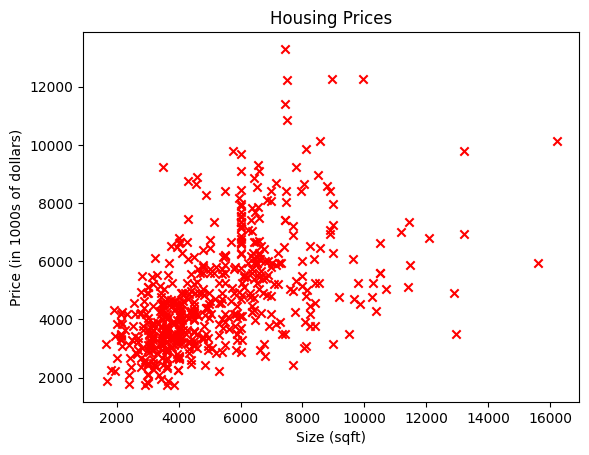

In [296]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (sqft)')
plt.show()

## Step 3: Model Function

The model function for linear regression (which is a function that maps from `x` to `y`) is represented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

### Understanding the Parameters:

- **$w$** (weight or slope): Determines how much the output changes for each unit change in input. A larger $w$ means steeper slope.
- **$b$** (bias or y-intercept): The value of $y$ when $x = 0$. It shifts the line up or down.

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot.

### How it Works:

For each input value $x^{(i)}$, the model:
1. Multiplies it by the weight $w$
2. Adds the bias $b$
3. Returns the predicted value $\hat{y}^{(i)}$

Let's implement this function and try different parameter values to see how they affect the predictions.

In [297]:
w = 1.5
b = 0
print(f"w: {w}")
print(f"b: {b}")

def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

w: 1.5
b: 0


### Implementing the Model Function

The `compute_model_output` function implements the linear regression equation. It:
1. Creates an array to store predictions
2. Loops through each training example
3. Computes $f_{w,b}(x^{(i)}) = wx^{(i)} + b$ for each example

**Try experimenting with different values of $w$ and $b$ to see how they affect the line!**

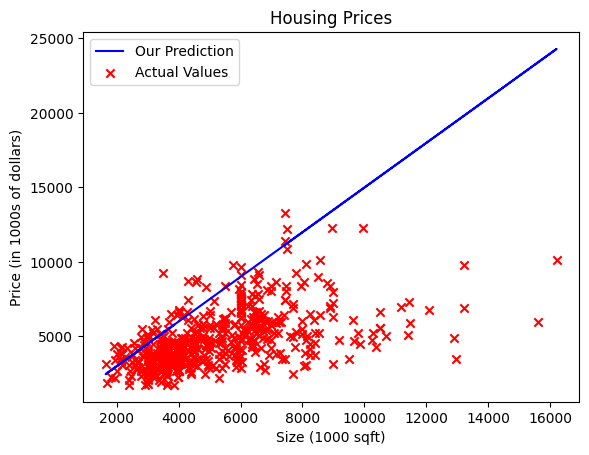

In [298]:
f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

### Visualizing Model Predictions

This plot shows:
- **Red crosses**: Actual house prices from our dataset
- **Blue line**: Our model's predictions based on current $w$ and $b$ values

The goal is to find values of $w$ and $b$ that make the blue line fit the red points as closely as possible.

### Model Fit Quality

Looking at the visualization above, we can see how well our current parameters fit the data. If the line doesn't pass through or near most of the data points, we need to adjust $w$ and $b$.

**Question**: How do we systematically find the best values for $w$ and $b$? 

**Answer**: We use a **cost function** to measure how well our model fits the data!

## Step 4: Cost Function

The **cost function** (also called **loss function**) measures how well our model performs. It quantifies the difference between predicted values and actual values.

### Mean Squared Error (MSE)

For linear regression, we use the Mean Squared Error cost function:

$$ J_{w,b} = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2 $$

### Breaking Down the Formula:

- **$f_{w,b}(x^{(i)})$**: Our model's prediction for example $i$
- **$y^{(i)}$**: The actual value for example $i$
- **$(f_{w,b}(x^{(i)}) - y^{(i)})$**: The error (or residual) for example $i$
- **Squaring the error**: Makes all errors positive and penalizes larger errors more heavily
- **$\sum_{i=1}^{m}$**: Sum the squared errors across all training examples
- **$\frac{1}{2m}$**: Average the error (the $\frac{1}{2}$ is a convention that simplifies calculus later)

### Goal:

Our objective is to **minimize** $J_{w,b}$ by finding optimal values of $w$ and $b$. The smaller the cost, the better our model fits the data!

In [299]:
def compute_cost(y, f_wb):
    """
    Computes the cost function for linear regression
    Args:
      y (ndarray (m,)): target values
      f_wb (ndarray (m,)): model prediction
    Returns
        total_cost (scalar): the cost of using w,b as the parameter for linear regression to fit the data points in x and y
    """
    cost_sum = 0
    m = y.shape[0] 
    for i in range(m):
        cost = (f_wb[i] - y[i]) ** 2
        cost_sum += cost

    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost 

print(compute_cost(y_train, f_wb))

8155100.847090459


### Implementing the Cost Function

The `compute_cost` function calculates the MSE by:
1. Computing the squared error for each training example
2. Summing all squared errors
3. Dividing by $2m$ to get the average

The output below shows the cost for our current model parameters. **Lower cost = better fit!**

## Step 5: Visualizing the Cost Function

To build intuition about how the cost function works, we'll create an interactive visualization that shows:

1. **Left plot**: The data points and our model's predictions with visual representation of errors
2. **Right plot**: How the cost changes as we vary the parameter $w$ (with $b$ fixed at 0)

This helps us understand the relationship between model parameters and the cost function.

In [300]:
# Plotting cost function
#initiate variables
from matplotlib.colors import LinearSegmentedColormap
from ipywidgets import interact
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0';
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
n_bin = 5
dlcm = LinearSegmentedColormap.from_list('dl_map', dlcolors, N=n_bin)

def plt_house_x(X, y,f_wb=None, ax=None):
    ''' plot house with aXis '''
    if not ax:
        fig, ax = plt.subplots(1,1)
    ax.scatter(X, y, marker='x', c='r', label="Actual Value")

    ax.set_title("Housing Prices")
    ax.set_ylabel('Price (in 1000s of dollars)')
    ax.set_xlabel(f'Size (sqft)')
    if f_wb is not None:
        ax.plot(X, f_wb,  c=dlblue, label="Our Prediction")
    ax.legend()

def mk_cost_lines(x,y,w,b, ax):
    ''' makes vertical cost lines'''
    cstr = "cost = (1/m)*("
    ctot = 0
    label = 'cost for point'
    addedbreak = False
   
    # Only plot for a subset of points to avoid clutter
    indices = np.linspace(0, len(x)-1, min(10, len(x)), dtype=int)
    for idx in indices:
        p = (x[idx], y[idx])
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1],f_wb_p, lw=3, color=dlpurple, ls='dotted', label=label)
        label='' #just one
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data',color=dlpurple,
            xytext=(5, 0), textcoords='offset points')
        cstr += f"{c_p_txt:0.0f} +"
        if len(cstr) > 38 and addedbreak is False:
            cstr += "\n"
            addedbreak = True
        ctot += c_p
    ctot = ctot/(len(indices))
    cstr = cstr[:-1] + f") = {ctot:0.0f}"
    ax.text(0.15,0.02,cstr, transform=ax.transAxes, color=dlpurple)

def plt_intuition(x_train, y_train):

    # Adjusted w_range to be more appropriate for the data scale
    w_range = np.array([0.5, 2.5])
    tmp_b = 0
    
    w_array = np.linspace(*w_range, 50)
    cost = np.zeros_like(w_array)
    for i in range(len(w_array)):
        tmp_w = w_array[i]
        tmp_f_wb = compute_model_output(x_train, tmp_w, tmp_b)
        cost[i] = compute_cost(y_train, tmp_f_wb)


    @interact(w=(w_range[0], w_range[1], 0.1),continuous_update=False)
    def func( w=1.5):
        # f_wb = np.dot(x_train, w) + tmp_b
        f_wb = compute_model_output(x_train, w, tmp_b)

        fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(16,5))
        fig.canvas.toolbar_position = 'bottom'

        mk_cost_lines(x_train, y_train, w, tmp_b, ax[0])
        plt_house_x(x_train, y_train, f_wb=f_wb, ax=ax[0])

        ax[1].plot(w_array, cost)
        # cur_cost = compute_cost(x_train, y_train, w, tmp_b)
        cur_cost = compute_cost(y_train, f_wb)
        ax[1].scatter(w,cur_cost, s=100, color=dldarkred, zorder= 10, label= f"cost at w={w}")
        ax[1].hlines(cur_cost, ax[1].get_xlim()[0],w, lw=4, color=dlpurple, ls='dotted')
        ax[1].vlines(w, ax[1].get_ylim()[0],cur_cost, lw=4, color=dlpurple, ls='dotted')
        ax[1].set_title("Cost vs. w, (b fixed at 0)")
        ax[1].set_ylabel('Cost')
        ax[1].set_xlabel('w')
        ax[1].legend(loc='upper center')
        fig.suptitle(f"Minimize Cost: Current Cost = {cur_cost:0.0f}", fontsize=12)
        plt.show()

### Visualization Helper Functions

The code below defines three helper functions:

1. **`plt_house_x`**: Creates a scatter plot of the housing data with optional model predictions
2. **`mk_cost_lines`**: Draws vertical lines showing the error (difference between prediction and actual value) for sample data points
3. **`plt_intuition`**: Creates an interactive widget that lets you adjust $w$ and see:
   - How the model line changes
   - How individual prediction errors change
   - How the total cost changes

The visualization uses a subset of data points to avoid clutter while still conveying the concept clearly.

In [301]:
plt_intuition(x_train,y_train)

interactive(children=(FloatSlider(value=1.5, description='w', max=2.5, min=0.5), Output()), _dom_classes=('wid…

### Interactive Cost Exploration

Use the slider below to adjust the weight parameter $w$ and observe:

- **Purple dotted lines**: Show the error for each sampled data point
- **Cost curve (right)**: Shows how the total cost varies with $w$
- **Red dot**: Indicates the current cost at the selected $w$ value

**Try to find the value of $w$ that minimizes the cost!** You'll notice the cost curve is convex (bowl-shaped), which means there's a single global minimum.

## Step 6: Finding Optimal Parameters

After exploring the cost function interactively, we've identified the parameter values that minimize the cost:

- **$w = 0.9$**: This means for every additional square foot, the price increases by approximately $900
- **$b = 0$**: The y-intercept is at zero, meaning our model predicts price primarily based on area

These parameters were found by observing where the cost function reaches its minimum. In practice, we would use **gradient descent** or other optimization algorithms to find these values automatically.

Let's visualize how well our optimized model fits the data:

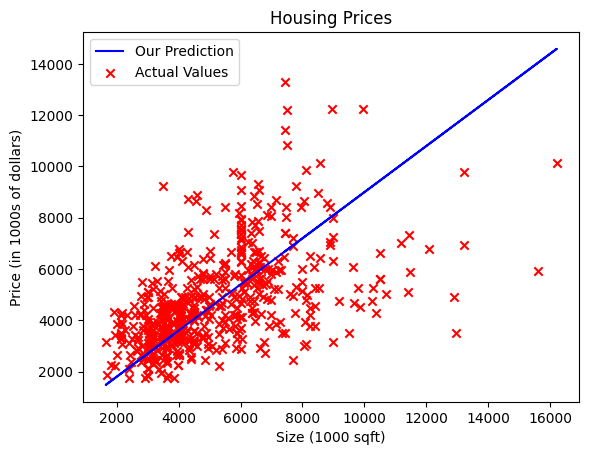

In [302]:
# Minimal Cost
final_w = 0.9
final_b = 0
f_wb = compute_model_output(x_train, final_w, final_b,)

# Plot our model prediction with minimal cost
plt.plot(x_train, f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

### Model with Optimal Parameters

The plot below shows our final trained model with the optimal parameters. Notice how the blue prediction line now fits much closer to the actual data points (red crosses) compared to our initial attempt.

The model has learned the relationship between house area and price from the training data!

## Step 7: Making Predictions

Now that we have a trained model with optimal parameters, we can use it to make predictions on new, unseen data!

### Example Prediction

Let's predict the price of a house with 1200 square feet of area. We simply apply our model equation:

$$\hat{y} = w \cdot x + b = 0.9 \times 1200 + 0 = 1080$$

This gives us the predicted price in thousands of dollars.

In [303]:
final_w = 0.9
final_b = 0
x_i = 1200
cost_1200sqft = final_w * x_i + final_b

print(f"${cost_1200sqft:.0f} thousand dollars")

$1080 thousand dollars


### Prediction Result

The code above computes the prediction for a 1200 sqft house. Based on our trained model, we can estimate the market value.

**Note**: This is a simplified model using only area as a feature. In reality, house prices depend on many factors (location, bedrooms, bathrooms, etc.). More features would improve prediction accuracy.

## Conclusion

Congratulations! You've successfully implemented linear regression from scratch. Let's recap what we learned:

### Key Takeaways:

1. **Linear Regression Model**: Maps input features to output predictions using the equation $f_{w,b}(x) = wx + b$

2. **Model Parameters**:
   - **$w$ (weight)**: Controls the slope of the line
   - **$b$ (bias)**: Controls the y-intercept

3. **Cost Function**: The Mean Squared Error (MSE) measures how well our model fits the data:
   $$J_{w,b} = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2$$

4. **Training Process**: Find the parameters $w$ and $b$ that minimize the cost function

5. **Making Predictions**: Once trained, the model can predict outputs for new inputs

### Next Steps:

- **Gradient Descent**: Learn how to automatically find optimal parameters
- **Multiple Features**: Extend to multivariate linear regression (multiple input variables)
- **Regularization**: Prevent overfitting on complex datasets
- **Evaluation Metrics**: R² score, RMSE, MAE to assess model performance

Linear regression is the foundation for understanding more complex machine learning algorithms!